In [62]:
import sys
from collections import namedtuple

import pandas as pd
import matplotlib.pyplot as plt
from ete3 import PhyloTree
import tqdm
from queue import Queue

sys.path.append('../scripts/')
from utils import node_parent


def read_tree(path: str, frmt=1) -> PhyloTree:
    tree = PhyloTree(path, format=frmt)
    return tree


def add_dist2root(substitutions: pd.DataFrame, tree: PhyloTree) -> pd.DataFrame:
    """ 
    calculate distance to root from each node and assign to mutations in table;
    mutation has distance of child node of edge
    """
    phylo_dist = dict()
    topology_dist = dict()
    phylo_dist[tree.name] = 0
    topology_dist[tree.name] = 0

    for node in tqdm.tqdm(tree.iter_descendants(), total=len(tree.get_descendants())):
        pd = tree.get_distance(node)
        td = int(tree.get_distance(node, topology_only=True))
       
        phylo_dist[node.name] = pd
        topology_dist[node.name] = td

    assert len(phylo_dist) == len(tree.get_descendants()) + 1
    assert len(topology_dist) == len(tree.get_descendants()) + 1

    substitutions = substitutions.copy()
    substitutions['phylo_dist'] = substitutions.child_node.map(phylo_dist)
    substitutions['topology_dist'] = substitutions.child_node.map(topology_dist)
    return substitutions
    

def add_id_col(df: pd.DataFrame, col_name="id"):
    """ add index column at first position """
    df = df.copy()
    columns = list(df.columns)
    df[col_name] = df.index
    new_columns = [col_name] + columns
    df = df[new_columns]
    return df

In [51]:
tree_path = "../data/mulal.filtered.fasta.prank.anc.dnd"
mut_path = "../data/mutations.csv"
tree = read_tree(tree_path)
df = pd.read_csv(mut_path)

In [52]:
df.head()

,pos,parent_nucl,child_nucl,parent_nucl_context,child_nucl_context,parent_node,child_node
0,1086,G,A,gtGtt,gtAtt,#54520#,#54519#
1,3676,T,C,atTtt,atCtt,#54520#,#54519#
2,7118,C,T,ttCta,ttTta,#54520#,#54519#
3,9564,C,T,ttCtt,ttTtt,#54520#,#54519#
4,10322,A,G,taAgg,taGgg,#54520#,#54519#


In [55]:
df = add_dist2root(df, tree)
df = add_id_col(df)

100%|██████████| 109040/109040 [00:11<00:00, 9637.79it/s]


In [56]:
df.head()

,id,pos,parent_nucl,child_nucl,parent_nucl_context,child_nucl_context,parent_node,child_node,phylo_dist,topology_dist
0,0,1086,G,A,gtGtt,gtAtt,#54520#,#54519#,0.1,0
1,1,3676,T,C,atTtt,atCtt,#54520#,#54519#,0.1,0
2,2,7118,C,T,ttCta,ttTta,#54520#,#54519#,0.1,0
3,3,9564,C,T,ttCtt,ttTtt,#54520#,#54519#,0.1,0
4,4,10322,A,G,taAgg,taGgg,#54520#,#54519#,0.1,0


In [57]:
df.corr()

,id,pos,phylo_dist,topology_dist
id,1.000000,-0.002646,0.977783,0.977783
pos,-0.002646,1.000000,-0.004478,-0.004478
phylo_dist,0.977783,-0.004478,1.000000,1.000000
topology_dist,0.977783,-0.004478,1.000000,1.000000


<AxesSubplot:>

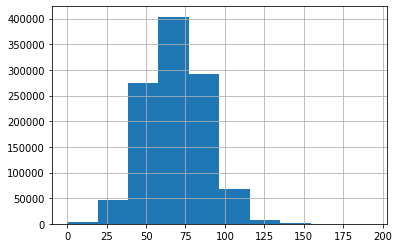

In [67]:
df.topology_dist.hist()

In [60]:
# func fragment to calculate dictribution of distances

phylo_dist = dict()
topology_dist = dict()
phylo_dist[tree.name] = 0
topology_dist[tree.name] = 0

for node in tqdm.tqdm(tree.iter_descendants(), total=len(tree.get_descendants())):
    pd = tree.get_distance(node)
    td = int(tree.get_distance(node, topology_only=True))
    
    phylo_dist[node.name] = pd
    topology_dist[node.name] = td

assert len(phylo_dist) == len(tree.get_descendants()) + 1
assert len(topology_dist) == len(tree.get_descendants()) + 1

100%|██████████| 109040/109040 [00:11<00:00, 9563.57it/s]


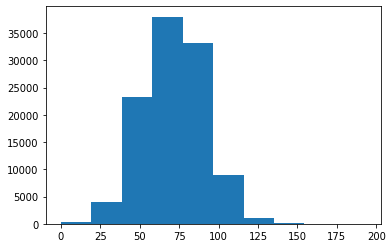

In [66]:
plt.hist(list(topology_dist.values()));

In [ ]:
meta_clean[meta_clean.strain == "hCoV-19/Japan/YCH0356/2021"]

,strain,gisaid_epi_isl,date,region,country,length,age,sex,pangolin_lineage,GISAID_clade,originating_lab,date_submitted
2380890,hCoV-19/Japan/YCH0356/2021,EPI_ISL_2978731,2021-07-06,Asia,Japan,29816,89,Female,B.1.1.7,O,"Genome Analysis Center, Yamanashi Central Hosp...",2021-07-16
2380891,hCoV-19/Japan/YCH0356/2021,EPI_ISL_2978732,2021-07-06,Asia,Japan,29816,85,Male,B.1.1.7,O,"Genome Analysis Center, Yamanashi Central Hosp...",2021-07-16
2380892,hCoV-19/Japan/YCH0356/2021,EPI_ISL_2978733,2021-07-11,Asia,Japan,29816,22,Male,B.1.1.7,O,"Department of Microbiology, Yamanashi Institut...",2021-07-16
2380893,hCoV-19/Japan/YCH0356/2021,EPI_ISL_2978734,2021-07-12,Asia,Japan,29816,26,Female,B.1.1.7,O,"Department of Microbiology, Yamanashi Institut...",2021-07-16
2380894,hCoV-19/Japan/YCH0356/2021,EPI_ISL_2978735,2021-07-13,Asia,Japan,29816,39,Female,B.1.1.7,O,"Department of Microbiology, Yamanashi Institut...",2021-07-16
2380895,hCoV-19/Japan/YCH0356/2021,EPI_ISL_2978736,2021-07-14,Asia,Japan,29816,22,Male,B.1.1.7,O,"Department of Microbiology, Yamanashi Institut...",2021-07-16
2380896,hCoV-19/Japan/YCH0356/2021,EPI_ISL_2978737,2021-07-14,Asia,Japan,29816,37,Male,B.1.1.7,O,"Department of Microbiology, Yamanashi Institut...",2021-07-16


In [ ]:

dist = dict()
q = Queue()
dist[tree.name] = 0
for child in tree.children:
    q.put(child)

while not q.empty():
    node: PhyloTree = q.get()
    dist[node.name] = dist[node_parent(node).name] + 1
    for child in node.children:
        q.put(child)

assert len(dist) == len(tree.get_descendants()) + 1


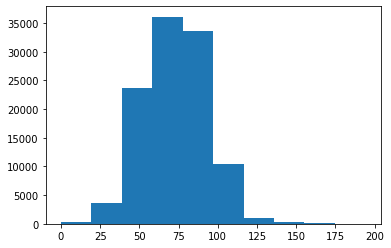

In [11]:
d = list(dist.values())

plt.hist(d);